11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
--- Starting VAE Training ---
Epoch 1/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 108s 185ms/step - kl_loss: 2.2948 - loss: 253.7407 - reconstruction_loss: 251.4458
Epoch 2/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 140s 181ms/step - kl_loss: 4.6928 - loss: 168.6439 - reconstruction_loss: 163.9511
Epoch 3/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 141s 180ms/step - kl_loss: 5.2054 - loss: 161.2901 - reconstruction_loss: 156.0847
Epoch 4/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 143s 182ms/step - kl_loss: 5.4484 - loss: 158.4585 - reconstruction_loss: 153.0101
Epoch 5/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 143s 185ms/step - kl_loss: 5.5732 - loss: 156.8485 - reconstruction_loss: 151.2752
Epoch 6/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 142s 185ms/step - kl_loss: 5.6677 - loss: 155.6491 - reconstruction_loss: 149.9814
Epoch 7/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 99s 181ms/step - kl_loss: 5.7399 - loss: 154.6692 - reconstruction_loss: 148.9293
Epoch 8/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 141s 180ms/step - k

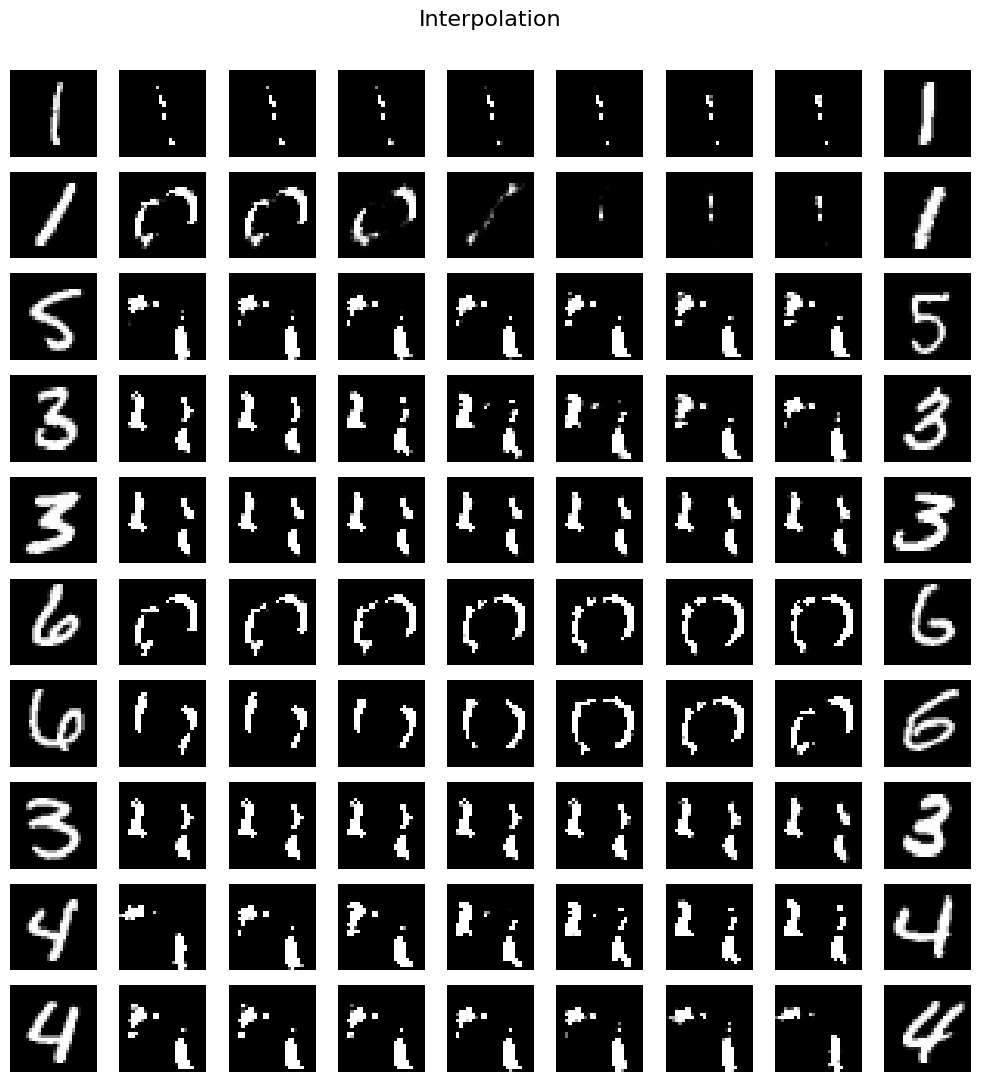


--- Generating interpolations for pairs of DIFFERENT digits ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━

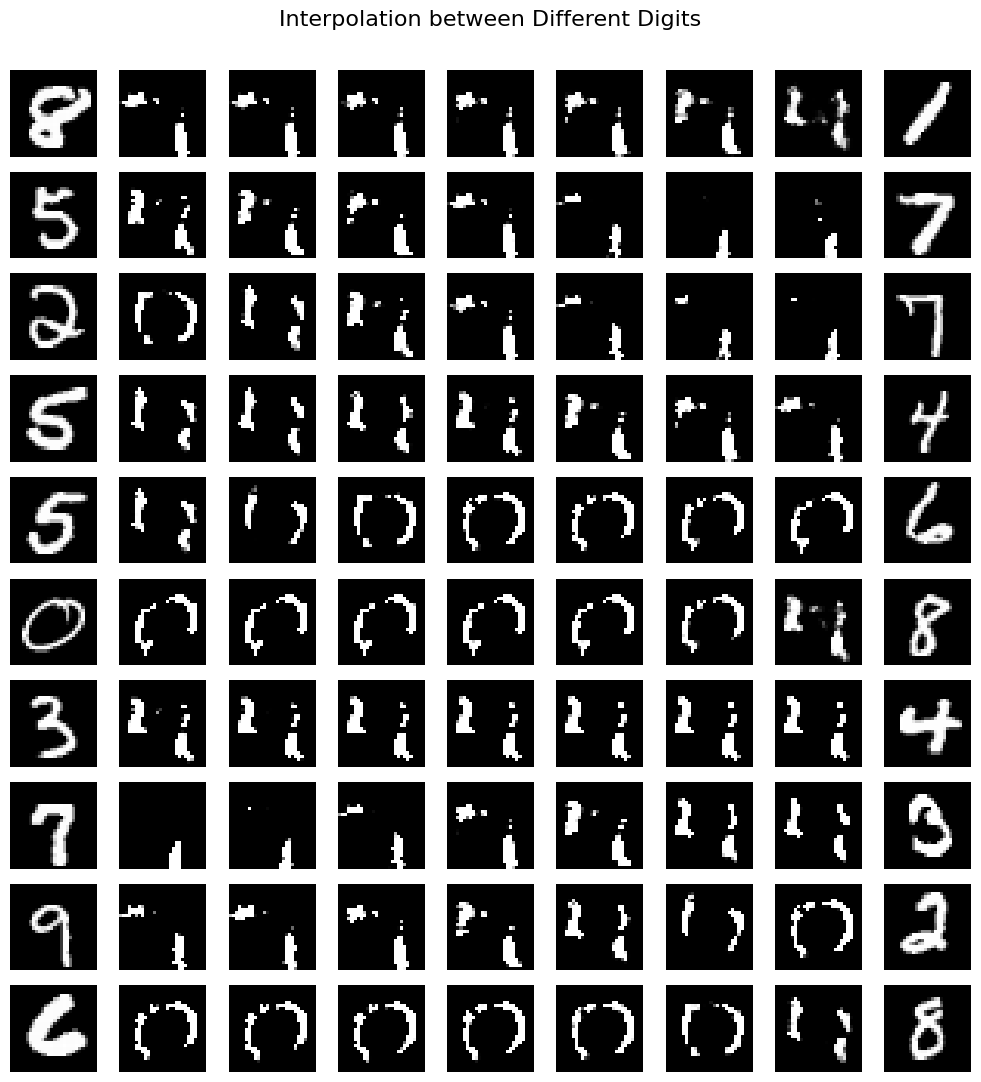

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# --- 1. VAE Model Implementation ---

class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

def build_encoder(latent_dim=2):
    """Builds the encoder model."""
    encoder_inputs = keras.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
    x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
    x = layers.Flatten()(x)
    x = layers.Dense(16, activation="relu")(x)
    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
    z = Sampling()([z_mean, z_log_var])
    encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
    return encoder

def build_decoder(latent_dim=2):
    """Builds the decoder model."""
    latent_inputs = keras.Input(shape=(latent_dim,))
    x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
    x = layers.Reshape((7, 7, 64))(x)
    x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
    x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
    decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
    decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
    return decoder

class VAE(keras.Model):
    """Combines the encoder and decoder into an end-to-end model."""
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

# --- 2. Data Loading and Training ---
def train_vae(vae_model, epochs=30):
    """Loads MNIST data and trains the VAE."""
    (x_train, _), (x_test, y_test) = keras.datasets.mnist.load_data()
    mnist_digits = np.concatenate([x_train, x_test], axis=0)
    mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

    print("--- Starting VAE Training ---")
    vae_model.compile(optimizer=keras.optimizers.Adam())
    vae_model.fit(mnist_digits, epochs=epochs, batch_size=128)
    print("--- VAE Training Complete ---")
    return x_test, y_test


# --- 3. Interpolation and Visualization ---
def plot_interpolations(encoder, decoder, x_test, y_test, same_digit=True):
    """
    Finds image pairs, performs latent space interpolation, and plots the results.
    """
    plt.figure(figsize=(10, 11))

    for i in range(10): # 10 rows
        # Find a pair of images
        if same_digit:
            digit = np.random.randint(0, 10)
            idxs = np.where(y_test == digit)[0]
            idx1, idx2 = np.random.choice(idxs, 2, replace=False)
            title = f"Interpolation of Digit: {digit}"
        else:
            idx1, idx2 = np.random.choice(len(y_test), 2, replace=False)
            while y_test[idx1] == y_test[idx2]: # Ensure digits are different
                idx1, idx2 = np.random.choice(len(y_test), 2, replace=False)
            title = f"Interpolation between {y_test[idx1]} and {y_test[idx2]}"

        if i == 0:
            plt.suptitle(title.split(" of ")[0] if same_digit else "Interpolation between Different Digits", fontsize=16)

        img1, img2 = x_test[idx1], x_test[idx2]

        # Encode the images to get their latent vectors
        _, _, z1 = encoder.predict(np.expand_dims(img1, axis=0))
        _, _, z2 = encoder.predict(np.expand_dims(img2, axis=0))

        # Linear interpolation
        num_steps = 7
        codes = np.zeros(shape=(num_steps, z1.shape[1]))
        for j, alpha in enumerate(np.linspace(0, 1, num_steps)):
             codes[j] = alpha * z2 + (1 - alpha) * z1

        # Decode the interpolated codes
        interpolated_images = decoder.predict(codes)

        # Plot the row
        # Original image 1
        ax = plt.subplot(10, 9, i * 9 + 1)
        plt.imshow(img1, cmap="gray")
        plt.axis("off")

        # Interpolated images
        for j in range(num_steps):
            ax = plt.subplot(10, 9, i * 9 + 2 + j)
            plt.imshow(interpolated_images[j].reshape(28, 28), cmap="gray")
            plt.axis("off")

        # Original image 2
        ax = plt.subplot(10, 9, i * 9 + 9)
        plt.imshow(img2, cmap="gray")
        plt.axis("off")

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()


if __name__ == '__main__':
    latent_dim = 2

    # Build and train the VAE
    encoder_model = build_encoder(latent_dim)
    decoder_model = build_decoder(latent_dim)
    vae = VAE(encoder_model, decoder_model)
    x_test_data, y_test_data = train_vae(vae)

    # Perform and plot interpolations for same digits
    print("\n--- Generating interpolations for pairs of the SAME digit ---")
    plot_interpolations(encoder_model, decoder_model, x_test_data, y_test_data, same_digit=True)

    # Perform and plot interpolations for different digits
    print("\n--- Generating interpolations for pairs of DIFFERENT digits ---")
    plot_interpolations(encoder_model, decoder_model, x_test_data, y_test_data, same_digit=False)